## Setup

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, TensorDataset

from src.data import DataLoaderScratch
from src.trainer import TrainerScratch
from src.optimizers import SGDScratch

## Load Data

In [2]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

## Preprocessing

In [3]:
# Transform the training data
X_train = mnist_trainset.data.float() / 255.0
X_train = X_train.view(X_train.shape[0], -1)
y_train = mnist_trainset.targets

# Transform the test data
X_val = mnist_testset.data.float() / 255.0
X_val = X_val.view(X_val.shape[0], -1)
y_val = mnist_testset.targets

train_dataloader = DataLoaderScratch(X_train, y_train, batch_size=256, shuffle=True)
val_dataloader = DataLoaderScratch(X_val, y_val, batch_size=256, shuffle=False)

## Logistic Regression From Scratch

### Single Batch from Scratch

In [4]:
num_samples = X_train.shape[0]
num_classes = y_train.unique().shape[0]
batch_size = 64

# Initialize W, it should be shape (num_features, num_classes) because it will 
# transform the input (num_examples, num_features) to the output (num_examples, num_classes)
W = torch.randn(size=(X_train.shape[1], num_classes), requires_grad=True)
# Initialize b, it should be shape (1, 1) because it will be a scalar we add to each class 
# prediction for each example
b = torch.zeros(num_classes, requires_grad=True)
                
# Define softmax, which maps scalars to probabilities
def softmax(X):
    X_exp = torch.exp(X)
    return X_exp / X_exp.sum(axis=1, keepdims=True)

# Define the log-loss 
def log_loss(y_pred, y):
    y_one_hot = nn.functional.one_hot(y)
    loss = -(y_one_hot * torch.log(y_pred)).sum(axis=1).mean()
    return loss

parameters = [W, b]
optimizer = SGDScratch(parameters, lr=0.1)

# Create a batch
X_batch = X_train[: batch_size]
y_batch = y_train[: batch_size]

In [5]:
# Zero gradients
optimizer.zero_grad()

# Forward pass (training)
O = X_batch @ W + b
y_pred = softmax(O)

# Calculate Loss
loss = log_loss(y_pred, y_batch)

# Backward pass (compute gradients)
loss.backward()

# Update parameters
optimizer.step()

### Define Training Loop and Model

In [6]:
def accuracy(y_pred, y_true):
    label_pred = torch.argmax(y_pred, axis=1)
    accuracy = torch.sum(label_pred == y_true) / y_pred.shape[0]
    return accuracy

In [7]:
class LogisticRegressionScratch(nn.Module):
    def __init__(self, in_features, num_classes):
        super().__init__()
        self.num_classes = num_classes
        self.W = torch.randn(size=(in_features, num_classes), requires_grad=True)
        self.b = torch.zeros(num_classes, requires_grad=True)

    def softmax(self, X):
        X_exp = torch.exp(X)
        X_softmax = X_exp / X_exp.sum(axis=1, keepdims=True)
        return X_softmax

    def forward(self, X):
        O = X @ self.W + self.b
        y_pred = self.softmax(O)
        return y_pred
    
    def parameters(self):
        return [self.W, self.b]

In [8]:
class CrossEntropyScratch(nn.Module):
    def __init__(self, num_classes):
        super(CrossEntropyScratch, self).__init__()
        self.num_classes = num_classes

    def forward(self, y_pred, y_true):
        y_one_hot = nn.functional.one_hot(y_true, self.num_classes)
        loss = -(y_one_hot * torch.log(y_pred)).sum(axis=1).mean()
        return loss

### Training the Model

Epoch 1/15, Training Loss: 11.1920, Validation Loss: 8.3991
Epoch 2/15, Training Loss: 7.1923, Validation Loss: 6.0164
Epoch 3/15, Training Loss: 5.4537, Validation Loss: 4.7070
Epoch 4/15, Training Loss: 4.4016, Validation Loss: 3.8691
Epoch 5/15, Training Loss: 3.7049, Validation Loss: 3.3011
Epoch 6/15, Training Loss: 3.2180, Validation Loss: 2.8972
Epoch 7/15, Training Loss: 2.8628, Validation Loss: 2.5965
Epoch 8/15, Training Loss: 2.5929, Validation Loss: 2.3650
Epoch 9/15, Training Loss: 2.3805, Validation Loss: 2.1819
Epoch 10/15, Training Loss: 2.2091, Validation Loss: 2.0331
Epoch 11/15, Training Loss: 2.0710, Validation Loss: 1.9100
Epoch 12/15, Training Loss: 1.9511, Validation Loss: 1.8067
Epoch 13/15, Training Loss: 1.8507, Validation Loss: 1.7183
Epoch 14/15, Training Loss: 1.7669, Validation Loss: 1.6421
Epoch 15/15, Training Loss: 1.6925, Validation Loss: 1.5759


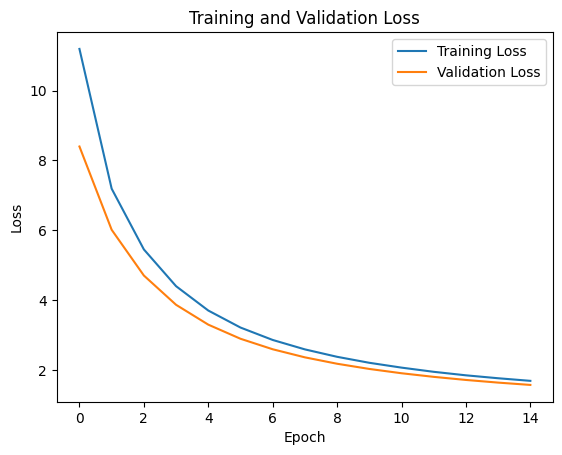

In [9]:
in_features = X_train.shape[1]
num_classes = y_train.unique().shape[0]
num_epochs = 15
learning_rate = 0.01

model = LogisticRegressionScratch(in_features=in_features, num_classes=num_classes)
optimizer = SGDScratch(model.parameters(), lr=learning_rate)
criterion = CrossEntropyScratch(num_classes=num_classes)
trainer = TrainerScratch(model, train_dataloader, val_dataloader, optimizer, criterion)
trainer.fit(num_epochs=num_epochs)

## Concise Implementation of Logistic Regression

Epoch 1/10, Training Loss: 2.0349, Validation Loss: 1.8545
Epoch 2/10, Training Loss: 1.8141, Validation Loss: 1.7534
Epoch 3/10, Training Loss: 1.7276, Validation Loss: 1.6872
Epoch 4/10, Training Loss: 1.6806, Validation Loss: 1.6571
Epoch 5/10, Training Loss: 1.6575, Validation Loss: 1.6400
Epoch 6/10, Training Loss: 1.6432, Validation Loss: 1.6289
Epoch 7/10, Training Loss: 1.6331, Validation Loss: 1.6206
Epoch 8/10, Training Loss: 1.6256, Validation Loss: 1.6142
Epoch 9/10, Training Loss: 1.6195, Validation Loss: 1.6090
Epoch 10/10, Training Loss: 1.6146, Validation Loss: 1.6047


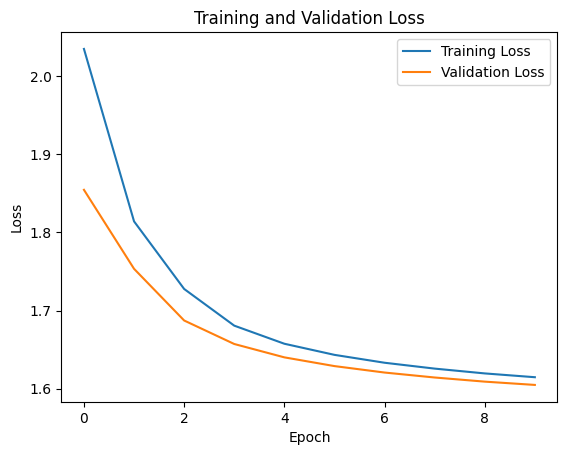

In [12]:
# Assuming X and y are your feature and target tensors
# Split Data into Train and Test Sets
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)

# Define DataLoader
batch_size = 256
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)

# Define the Linear Regression Model
class LogisticRegression(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        out = self.linear(x)
        out = self.softmax(out)
        return out

model = LogisticRegression(input_size=X_train.shape[1], num_classes=y_train.unique().shape[0])

# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)
trainer = TrainerScratch(model, train_dataloader, val_dataloader, optimizer, criterion)
trainer.fit(num_epochs=10)